In [1]:
import geopandas as gpd
from pathlib import Path

import sys
sys.path.insert(0, '../../geocoded_object_extractor')
from geocoded_object_extractor import TreeDataset
import matplotlib.pyplot as plt
import pandas as pd
import rioxarray
import xarray as xr

In [2]:
path_rgb = '../../../data/Fieldwork_data/PNM/PROCESSADOS/Map1_Orthomosaic_export_SatJun10172428194829.tif'
path_bbox = '../../../data/Tree_location1.gpkg'

In [3]:
# Get all .shp files
dir_bbox = Path(path_bbox)
shp_bbox_list = list(dir_bbox.glob('*.shp'))
shp_bbox_list

[PosixPath('../../../data/Fieldwork_data/predicted_boxes/crop_900/tile500_overlap0.45.shp'),
 PosixPath('../../../data/Fieldwork_data/predicted_boxes/crop_900/tile600_overlap0.55.shp'),
 PosixPath('../../../data/Fieldwork_data/predicted_boxes/crop_900/tile500_overlap0.55.shp'),
 PosixPath('../../../data/Fieldwork_data/predicted_boxes/crop_900/tile600_overlap0.45.shp')]

In [4]:
gdf_tree_bbox= gpd.read_file(shp_bbox_list[0])

In [5]:
img = rioxarray.open_rasterio(path_rgb)
gdf_tree_bbox = gdf_tree_bbox.set_crs(img.rio.crs)

In [6]:
classes = pd.DataFrame(0, columns=['label'], index=gdf_tree_bbox.index)

In [7]:
ds = TreeDataset([path_rgb],gdf_tree_bbox['geometry'], classes['label'], augment_data=False, min_pixel_size=50, max_pixel_size=400, pixel_size=400)

In [8]:
tiles = ds.get_cutouts()

In [9]:
ds = xr.Dataset(
    data_vars={
        "X": (["sample", "x", "y", "channel"], tiles[2]),
        "Y": (["sample"], tiles[1]),
    }
)
ds

<xarray.Dataset>
Dimensions:  (sample: 239, x: 400, y: 400, channel: 4)
Dimensions without coordinates: sample, x, y, channel
Data variables:
    X        (sample, x, y, channel) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Y        (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0

Text(0.5, 1.0, 'True class 0')

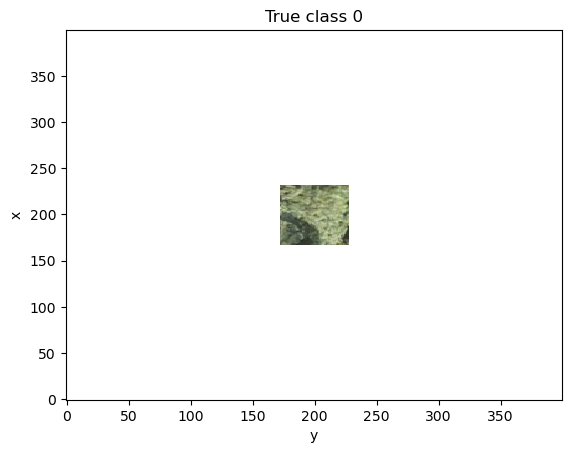

In [13]:
# Visualize the test sample
test_sample = ds.isel(sample=2)
test_sample['X'].astype('int').plot.imshow()
plt.title(f"True class {test_sample['Y'].values.astype('str')}")

In [14]:
ds.to_zarr('brazil_cutouts.zarr')